In [1]:
import numpy as np
import pandas as pd
from utils.data import load_tc_data
from utils.plot import make_cmap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import seaborn as sns

# TODO: be sure about what's going on with inverted lats
# TODO: why are there blank images still?
# TODO: may need to look at generate_predictins_2 script to make sure the correct images are flipped

# If you have/make the file ~/.ssh/config, you can define settings to ssh from local to a BP node e.g.:
# Host bluepebble
# User yourusername
# Hostname bp1-login.acrc.bris.ac.uk
# PreferredAuthentications publickey
# ProxyCommand ssh yourusername@seis.bris.ac.uk nc %h %p

# Host bluepebble1
# User yourusername
# Hostname bp1-login01.acrc.bris.ac.uk
# PreferredAuthentications publickey
# ProxyCommand ssh yourusername@seis.bris.ac.uk nc %h %p
# Then start a notebook and make a local connection with something like:
# PORT=1234
# ssh -f -N -L 8080:localhost:$PORT bluepebble1
# ssh bluepebble1 "module load lang/python/anaconda; jupyter notebook --no-browser --port=$PORT"
# (choose a number that's likely to be unique to you for PORT. You can also insert a command to activate a given conda env after the model load part)

In [2]:
# era5,era5_real,era5_input,era5_meta,mswep,mswep_real,mswep_input,mswep_meta = load_tc_data(set='extreme_valid',results='era5')
era5,era5_real,era5_input,era5_meta = load_tc_data(set='validation',results='era5')
real,inputs,pred_cnn,pred_vaegan,pred_gan,pred_ensemble_vaegan,pred_ensemble_gan,meta = load_tc_data(set='validation',results='test')

In [3]:
precip_cmap,precip_norm = make_cmap()

In [ ]:
# i = 100

# gridspec = {'width_ratios': [1,1, 0.2]}
# fig, axes = plt.subplots(3, 8, figsize=(15, 5))

# storms = np.arange(0,200,10)
# storm = 0
# # for i in range(3):
# for j in range(8):
# 	storm = storm + 1
# 	axes[0,j].axis('off')
# 	axes[1,j].axis('off')
# 	axes[2,j].axis('off')
# 	axes[0,j].imshow(mswep_input[storm],cmap=precip_cmap)
# 	axes[1,j].imshow(mswep[storm,:,:,0],cmap=precip_cmap)
# 	axes[2,j].imshow(mswep_real[storm],cmap=precip_cmap)


In [ ]:
# plt.hist(era5_real.flatten(),bins=np.arange(0,55,0.5))
# sns.kdeplot(era5_real.flatten())
# # plt.show()
# sns.kdeplot(mswep_real.flatten())
# # plt.hist(mswep_real.flatten(),bins=np.arange(0,55,0.5))
# plt.show()


In [ ]:
print(mswep_real.shape)
print(mswep.shape)
print(mswep_input.shape)
print(era5_real.shape)
print(era5.shape)
print(era5_input.shape)

In [9]:
def mean2d(array):
	return np.mean(np.mean(array,axis=1),axis=1)

def peak2d(array):
	return np.max(np.max(array,axis=1),axis=1)

mswep_real_2 = mean2d(real)
era5_real_2 = mean2d(era5_real)
mswep_2 = mean2d(pred_ensemble_gan[:,:,:,0])
era5_2 = mean2d(era5[:,:,:,0])
mswep_input_2 = mean2d(inputs)
era5_input_2 = mean2d(era5_input[:,:,:,0])

mswep_real_3 = peak2d(real)
era5_real_3 = peak2d(era5_real)
mswep_3 = peak2d(pred_ensemble_gan[:,:,:,0])
era5_3 = peak2d(era5[:,:,:,0])
mswep_input_3 = peak2d(inputs)
era5_input_3 = peak2d(era5_input[:,:,:,0])

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


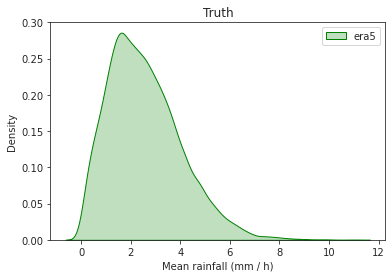

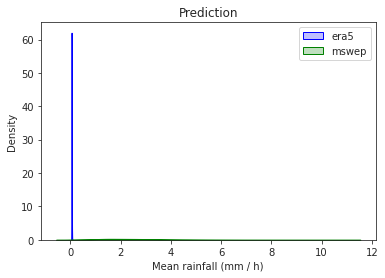

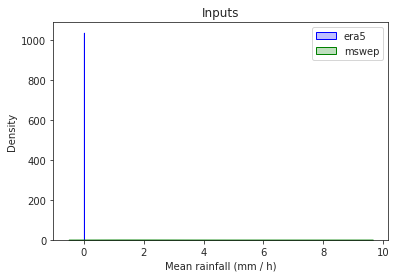

In [10]:
sns.kdeplot(era5_real_2.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_real_2.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.title('Truth')
plt.xlabel('Mean rainfall (mm / h)')
plt.show()

sns.kdeplot(era5_2.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_2.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.title('Prediction')
plt.xlabel('Mean rainfall (mm / h)')
plt.show()

# from turtle import fillcolor
sns.set_style("ticks")
sns.kdeplot(era5_input_2.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_input_2.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.xlabel('Mean rainfall (mm / h)')
plt.title('Inputs')
plt.show()

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


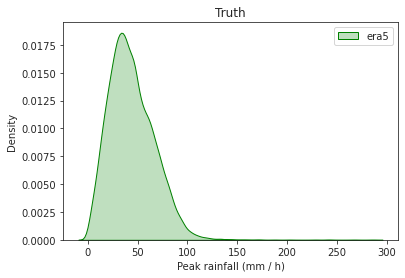

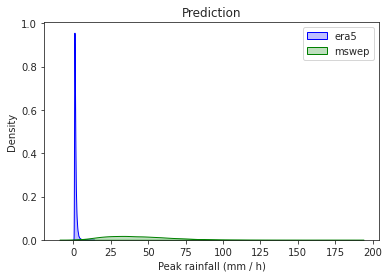

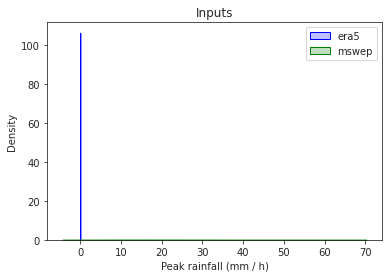

In [11]:
sns.kdeplot(era5_real_3.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_real_3.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.title('Truth')
plt.xlabel('Peak rainfall (mm / h)')
plt.show()

sns.kdeplot(era5_3.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_3.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.title('Prediction')
plt.xlabel('Peak rainfall (mm / h)')
plt.show()

# from turtle import fillcolor
sns.set_style("ticks")
sns.kdeplot(era5_input_3.flatten(),fill=True,color='blue')
sns.kdeplot(mswep_input_3.flatten(),fill=True,color='green')
plt.legend(['era5','mswep'])
plt.xlabel('Peak rainfall (mm / h)')
plt.title('Inputs')
plt.show()

In [ ]:
data = np.load('/user/home/al18709/work/tc_data_era5_flipped/train_X.npy')
print(data.shape)

In [ ]:
era5,era5_real,era5_input,era5_meta = load_tc_data(set='validation',results='era5')

In [ ]:
print(era5.shape)
print(era5_real.shape)
print(era5_input.shape)

In [ ]:
i = 100

gridspec = {'width_ratios': [1,1, 0.2]}
fig, axes = plt.subplots(3, 8, figsize=(15, 5))

storms = np.arange(0,200,10)
storm = 80
# for i in range(3):
for j in range(8):
	storm = storm + 1
	axes[0,j].axis('off')
	axes[1,j].axis('off')
	axes[2,j].axis('off')
	axes[0,j].imshow(era5_input[storm],cmap=precip_cmap)
	axes[1,j].imshow(era5[storm,:,:,0],cmap=precip_cmap)
	axes[2,j].imshow(era5_real[storm],cmap=precip_cmap)

In [ ]:
# print(np.sum(era5_real))
print(np.sum(era5_input))
print(np.sum(era5))
print(np.max(era5_input))

In [ ]:
valid  = np.load('/user/home/al18709/work/tc_data_era5_10/valid_X.npy')
print(valid.shape)
print(np.sum(valid))
print(np.max(valid))

In [ ]:
valid  = np.load('/user/home/al18709/work/tc_data_era5_flipped_10/valid_X.npy')
print(valid.shape)
print(np.sum(valid))
print(np.max(valid))

In [ ]:
valid  = xr.load_dataset('/user/work/al18709/tropical_cyclones/era5/ZUMAN_1998087S15172_hour-9_idx-47189_cat-0_basin-SP_centrelat--20.4597_centrelon-165.542.nc').precipitation.values
print(valid.shape)
print(np.sum(valid))
print(np.max(valid))
plt.imshow(valid,cmap=precip_cmap)

In [ ]:
valid  = np.load('/user/home/al18709/work/tc_Xy_era5_10/X_1988055S10180.npy')
print(valid.shape)
print(np.sum(valid))
print(np.max(valid))
plt.imshow(valid[0],cmap=precip_cmap)

In [ ]:
rain = xr.load_dataset('/bp1store/geog-tropical/data/ERA-5/hour/precipitation_invertlat/ERA5_precipitation_3hrly_197901.nc')
rain_2 = xr.load_dataset('/bp1store/geog-tropical/data/ERA-5/hour/precipitation/ERA5_precipitation_3hrly_197901.nc')

In [ ]:
print(np.sum(rain.tp.values))
print(np.max(rain.tp.values))
print(np.sum(rain_2.tp.values))
print(np.max(rain_2.tp.values))

In [ ]:

print(rain.time)


In [ ]:
print(rain_2.time)

In [ ]:
print(rain.tp[0].values)

In [ ]:
print(rain_2.tp[0].values)